<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [8]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [50]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv("./data/job_listings.csv")
df.head()
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [52]:
df['description'] = [BeautifulSoup(text, "lxml").get_text() for text in df['description']]
df['description'] = df['description'].apply(lambda x: x.strip("b'"))
df.head()

,Unnamed: 0,description,title
0,0,"""Job Requirements:\nConceptual understanding i...",Data scientist
1,1,"Job Description\n\nAs a Data Scientist 1, you ...",Data Scientist I
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,4,Location: USA \xe2\x80\x93 multiple locations\...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [53]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)
    
df['tokens'] = tokens
df.head()

,Unnamed: 0,description,title,tokens
0,0,"""Job Requirements:\nConceptual understanding i...",Data scientist,"[""job, requirements:\nconceptual, understandin..."
1,1,"Job Description\n\nAs a Data Scientist 1, you ...",Data Scientist I,"[job, description\n\nas, data, scientist, 1,, ..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$4,969, $6,756, monthcontractunder, general, ..."
4,4,Location: USA \xe2\x80\x93 multiple locations\...,Data Scientist,"[location:, usa, \xe2\x80\x93, multiple, locat..."


In [16]:
# df['tokens'].value_counts()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [54]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from sklearn.feature_extraction.text import CountVectorizer

# create the transformer
vect = CountVectorizer(stop_words='english')

# build vocab
vect.fit(df['description'])

# transform text
dtm = vect.transform(df['description'])
print(dtm)

  (0, 225)	1
  (0, 636)	1
  (0, 670)	1
  (0, 884)	1
  (0, 1421)	1
  (0, 1476)	1
  (0, 1560)	1
  (0, 1637)	1
  (0, 2018)	1
  (0, 2078)	1
  (0, 2113)	1
  (0, 2423)	1
  (0, 2554)	1
  (0, 2885)	2
  (0, 2902)	1
  (0, 3057)	1
  (0, 3082)	1
  (0, 3184)	1
  (0, 3281)	1
  (0, 3396)	1
  (0, 3405)	1
  (0, 3544)	1
  (0, 3653)	1
  (0, 3662)	1
  (0, 4203)	1
  :	:
  (425, 9102)	1
  (425, 9108)	1
  (425, 9139)	1
  (425, 9238)	1
  (425, 9266)	1
  (425, 9301)	1
  (425, 9311)	2
  (425, 9342)	2
  (425, 9366)	1
  (425, 9375)	1
  (425, 9411)	1
  (425, 9431)	1
  (425, 9466)	1
  (425, 9487)	1
  (425, 9535)	1
  (425, 9606)	1
  (425, 9630)	6
  (425, 9636)	1
  (425, 9639)	1
  (425, 9642)	1
  (425, 9664)	5
  (425, 9677)	2
  (425, 9713)	3
  (425, 9781)	5
  (425, 9794)	2


In [55]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [56]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)
# new = nn.transform(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [57]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
# import the PCA module from sklearn
from sklearn.decomposition import PCA
# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

dtm_transformed = pca.fit_transform(dtm)

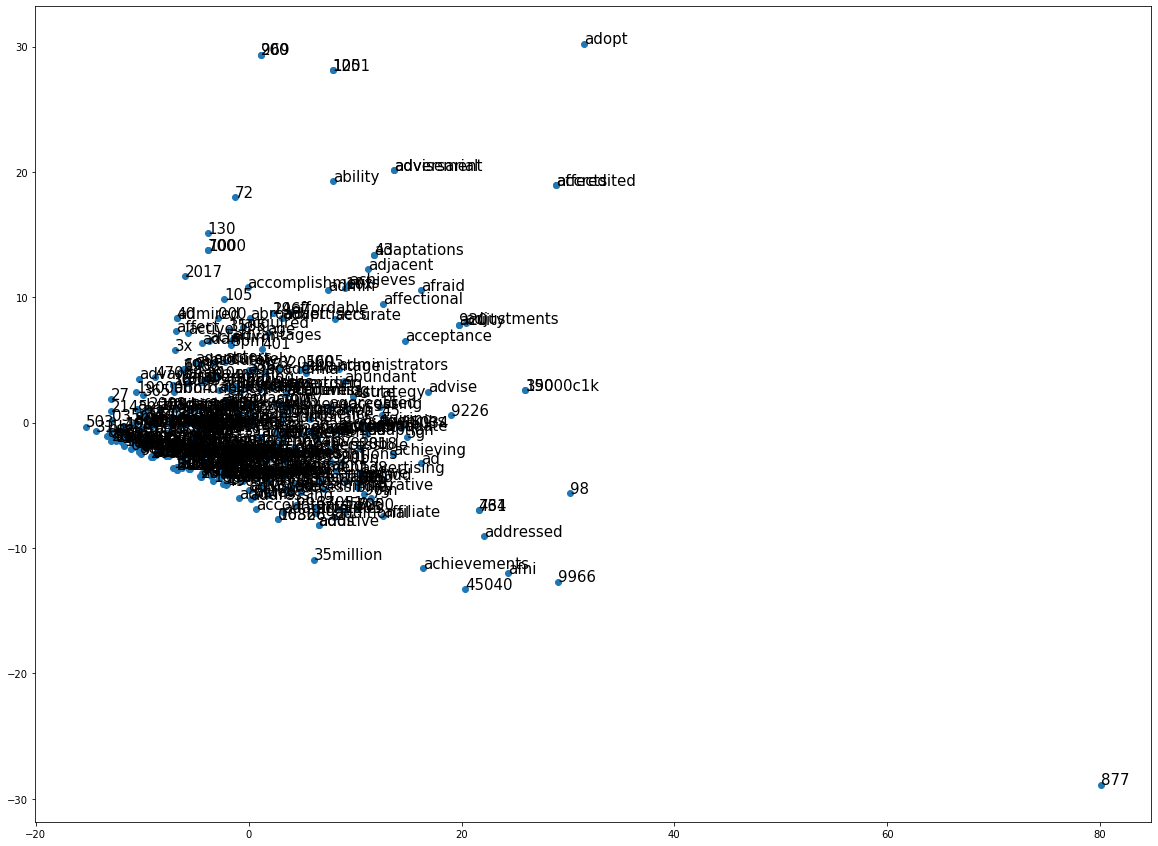

In [58]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(dtm_transformed[:,0], dtm_transformed[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(dtm, dtm_transformed):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [59]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.104421,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [60]:
dtm.shape

(426, 9817)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [62]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [64]:

description = ["""
We’re looking for a data scientist with a passion for tackling big problems. A member of our Predictive Modeling team, you 
will be embedded in our Advocate Center with a mission to identify opportunities to apply your unique skillset, ensure 
confidence in your products and promote their adoption among our Advocate teams. Your predictive models will inform decisions and 
drive real-time strategy in this critical area. You will have the opportunity to work with a top-caliber team of former professors and 
PhDs, develop insights from a large array of proprietary datasets, and apply cutting edge methods in machine learning, experimental design, 
simulation and optimization, and statistics. Most importantly, you will have the satisfaction of working
side-by-side with our advocates and witnessing the direct impact your products have as they use them to enhance the customer experience."""]

# Query for Sim of Random doc to BBC
new = tfidf.transform(description)

In [65]:
nn.kneighbors(new.todense())

(array([[1.30717964, 1.30717964, 1.31755615, 1.32178347, 1.32178347]]),
 array([[ 52, 142, 201,  98,  64]], dtype=int64))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 